# Library Imports

In [1]:
# importing essential libraries for data cleaning and EDA
import numpy as np
import pandas as pd
import math


# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

# modeling libraries
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score,plot_confusion_matrix, plot_roc_curve, f1_score, SCORERS
from sklearn.feature_selection import RFECV

import xgboost as xgb
from xgboost import XGBClassifier

import featuretools as ft
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

# Data Import & Processing

We will read in our train and test data that was processed from the previous notebook.

## Train Dataset

In [2]:
df = pd.read_csv('../datasets/train_modeling_final.csv')

In [3]:
df.head()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,multiplebins,year,month,week,day,weekdayname,dayofyear,culex pipiens,culex pipiens/restuans,culex restuans,avgtemp_week1_1,avglight_week1_1,avghumid_week1_1,avgrain_week1_1,avgwind_week1_1,avgtemp_week1_2,avglight_week1_2,avghumid_week1_2,avgrain_week1_2,avgwind_week1_2,avgtemp_week1_3,avglight_week1_3,avghumid_week1_3,avgrain_week1_3,avgwind_week1_3,avgtemp_week1_4,avglight_week1_4,avghumid_week1_4,avgrain_week1_4,avgwind_week1_4,avgtemp_week1_5,avglight_week1_5,avghumid_week1_5,avgrain_week1_5,avgwind_week1_5,avgtemp_week1_6,avglight_week1_6,avghumid_week1_6,avgrain_week1_6,avgwind_week1_6,avgtemp_week1_7,avglight_week1_7,avghumid_week1_7,avgrain_week1_7,avgwind_week1_7,avgtemp_week1_8,avglight_week1_8,avghumid_week1_8,avgrain_week1_8,avgwind_week1_8,avgtemp_week2_2,avglight_week2_2,avghumid_week2_2,avgrain_week2_2,avgwind_week2_2,avgtemp_week2_3,avglight_week2_3,avghumid_week2_3,avgrain_week2_3,avgwind_week2_3,avgtemp_week2_4,avglight_week2_4,avghumid_week2_4,avgrain_week2_4,avgwind_week2_4,avgtemp_week2_5,avglight_week2_5,avghumid_week2_5,avgrain_week2_5,avgwind_week2_5,avgtemp_week2_6,avglight_week2_6,avghumid_week2_6,avgrain_week2_6,avgwind_week2_6,avgtemp_week2_7,avglight_week2_7,avghumid_week2_7,avgrain_week2_7,avgwind_week2_7,avgtemp_week2_8,avglight_week2_8,avghumid_week2_8,avgrain_week2_8,avgwind_week2_8,avgtemp_week3_3,avglight_week3_3,avghumid_week3_3,avgrain_week3_3,avgwind_week3_3,avgtemp_week3_4,avglight_week3_4,avghumid_week3_4,avgrain_week3_4,avgwind_week3_4,avgtemp_week3_5,avglight_week3_5,avghumid_week3_5,avgrain_week3_5,avgwind_week3_5,avgtemp_week3_6,avglight_week3_6,avghumid_week3_6,avgrain_week3_6,avgwind_week3_6,avgtemp_week3_7,avglight_week3_7,avghumid_week3_7,avgrain_week3_7,avgwind_week3_7,avgtemp_week3_8,avglight_week3_8,avghumid_week3_8,avgrain_week3_8,avgwind_week3_8,avgtemp_week4_4,avglight_week4_4,avghumid_week4_4,avgrain_week4_4,avgwind_week4_4,avgtemp_week4_5,avglight_week4_5,avghumid_week4_5,avgrain_week4_5,avgwind_week4_5,avgtemp_week4_6,avglight_week4_6,avghumid_week4_6,avgrain_week4_6,avgwind_week4_6,avgtemp_week4_7,avglight_week4_7,avghumid_week4_7,avgrain_week4_7,avgwind_week4_7,avgtemp_week4_8,avglight_week4_8,avghumid_week4_8,avgrain_week4_8,avgwind_week4_8,avgtemp_week5_5,avglight_week5_5,avghumid_week5_5,avgrain_week5_5,avgwind_week5_5,avgtemp_week5_6,avglight_week5_6,avghumid_week5_6,avgrain_week5_6,avgwind_week5_6,avgtemp_week5_7,avglight_week5_7,avghumid_week5_7,avgrain_week5_7,avgwind_week5_7,avgtemp_week5_8,avglight_week5_8,avghumid_week5_8,avgrain_week5_8,avgwind_week5_8,avgtemp_week6_6,avglight_week6_6,avghumid_week6_6,avgrain_week6_6,avgwind_week6_6,avgtemp_week6_7,avglight_week6_7,avghumid_week6_7,avgrain_week6_7,avgwind_week6_7,avgtemp_week6_8,avglight_week6_8,avghumid_week6_8,avgrain_week6_8,avgwind_week6_8,avgtemp_week7_7,avglight_week7_7,avghumid_week7_7,avgrain_week7_7,avgwind_week7_7,avgtemp_week7_8,avglight_week7_8,avghumid_week7_8,avgrain_week7_8,avgwind_week7_8,avgtemp_week8_8,avglight_week8_8,avghumid_week8_8,avgrain_week8_8,avgwind_week8_8,ClusterIDs,Cluster: 0,Cluster: 1,Cluster: 10,Cluster: 11,Cluster: 12,Cluster: 13,Cluster: 14,Cluster: 15,Cluster: 16,Cluster: 17,Cluster: 18,Cluster: 19,Cluster: 2,Cluster: 20,Cluster: 21,Cluster: 22,Cluster: 23,Cluster: 24,Cluster: 25,Cluster: 26,Cluster: 27,Cluster: 28,Cluster: 29,Cluster: 3,Cluster: 4,Cluster: 5,Cluster: 6,Cluster: 7,Cluster: 8,Cluster: 9
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1,0,0,2007,5,22,29,Tuesday,149,0,1,0,23.333333,14.766667,34.186695,0.0,10.6,16.666667,14.65000,48.758546,0.09750,9.975,17.518519,14.533333,50.265172,0.053333,9.533333,18.118687,14.405303,47.912666,0.036364,10.250000,18.118687,14.405303,47.912666,0.036364,10.250000,18.118687,14.405303,47.912666,0.036364,10.250000,18.118687,14.405303,47.912666,0.036364,10.250000,18.118687,14.405303,47.912666,0.036364,10.250000,20.555556,14.533333,63.268000,0.6,10.8,18.750

In [4]:
df = df.drop(['date', 'species', 'trap','weekdayname','ClusterIDs'], axis=1)

In [5]:
weather_cols = df.columns[df.columns.str.contains("avg")]

In [6]:
weather_cols

Index(['avgtemp_week1_1', 'avglight_week1_1', 'avghumid_week1_1',
       'avgrain_week1_1', 'avgwind_week1_1', 'avgtemp_week1_2',
       'avglight_week1_2', 'avghumid_week1_2', 'avgrain_week1_2',
       'avgwind_week1_2',
       ...
       'avgtemp_week7_8', 'avglight_week7_8', 'avghumid_week7_8',
       'avgrain_week7_8', 'avgwind_week7_8', 'avgtemp_week8_8',
       'avglight_week8_8', 'avghumid_week8_8', 'avgrain_week8_8',
       'avgwind_week8_8'],
      dtype='object', length=180)

In [12]:
# Best columns

In [13]:
best_cols = ['avgtemp_week1_8', 'avghumid_week7_8', 'avghumid_week1_2', 
             'avglight_week8_8', 'avgrain_week1_1', 'avgwind_week5_7',
            'avghumid_week3_6', 'avglight_week1_1', 'avgrain_week3_7', 'avgwind_week1_4']
# using correlation

In [14]:
# Create dataframe to store best weather columns only 
df_best_w = df.drop(columns=weather_cols).copy()

In [15]:
df_best_w.head()

,latitude,longitude,nummosquitos,wnvpresent,multiplebins,year,month,week,day,dayofyear,culex pipiens,culex pipiens/restuans,culex restuans,Cluster: 0,Cluster: 1,Cluster: 10,Cluster: 11,Cluster: 12,Cluster: 13,Cluster: 14,Cluster: 15,Cluster: 16,Cluster: 17,Cluster: 18,Cluster: 19,Cluster: 2,Cluster: 20,Cluster: 21,Cluster: 22,Cluster: 23,Cluster: 24,Cluster: 25,Cluster: 26,Cluster: 27,Cluster: 28,Cluster: 29,Cluster: 3,Cluster: 4,Cluster: 5,Cluster: 6,Cluster: 7,Cluster: 8,Cluster: 9
0,41.95469,-87.800991,1,0,0,2007,5,22,29,149,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,41.95469,-87.800991,1,0,0,2007,5,22,29,149,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,41.95469,-87.800991,3,0,0,2007,6,23,5,156,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,41.95469,-87.800991,5,0,0,2007,6,23,5,156,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,41.95469,-87.800991,1,0,0,2007,6,23,5,156,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [16]:
df_best_w = pd.merge(df_best_w, df[best_cols], left_index=True, right_index=True)

In [17]:
# Create list to store all categorical variables
features_to_drop = []
for col in df_best_w.columns:
    if df_best_w[col].nunique() <= 2:
        features_to_drop.append(col)

In [18]:
df_best_w.shape

(10506, 53)

In [19]:
features_to_drop.extend(['wnvpresent', 'nummosquitos'])

In [20]:
# Create list to store features to do polynomial features
features_to_poly = df_best_w.drop(columns=features_to_drop).columns.tolist()

In [21]:
poly = PolynomialFeatures(2, include_bias=False, interaction_only=True)
columns = df_best_w[features_to_poly].columns.tolist()
df_best_poly = poly.fit_transform(df_best_w[features_to_poly]) #Polynomialize features and add to an array df_poly
df_best_poly = pd.DataFrame(df_best_poly, 
                       columns = poly.get_feature_names(columns)) 

In [22]:
df_best_poly.head()

,latitude,longitude,year,month,week,day,dayofyear,avgtemp_week1_8,avghumid_week7_8,avghumid_week1_2,avglight_week8_8,avgrain_week1_1,avgwind_week5_7,avghumid_week3_6,avglight_week1_1,avgrain_week3_7,avgwind_week1_4,latitude longitude,latitude year,latitude month,latitude week,latitude day,latitude dayofyear,latitude avgtemp_week1_8,latitude avghumid_week7_8,latitude avghumid_week1_2,latitude avglight_week8_8,latitude avgrain_week1_1,latitude avgwind_week5_7,latitude avghumid_week3_6,latitude avglight_week1_1,latitude avgrain_week3_7,latitude avgwind_week1_4,longitude year,longitude month,longitude week,longitude day,longitude dayofyear,longitude avgtemp_week1_8,longitude avghumid_week7_8,longitude avghumid_week1_2,longitude avglight_week8_8,longitude avgrain_week1_1,longitude avgwind_week5_7,longitude avghumid_week3_6,longitude avglight_week1_1,longitude avgrain_week3_7,longitude avgwind_week1_4,year month,year week,year day,year dayofyear,year avgtemp_week1_8,year avghumid_week7_8,year avghumid_week1_2,year avglight_week8_8,year avgrain_week1_1,year avgwind_week5_7,year avghumid_week3_6,year avglight_week1_1,year avgrain_week3_7,year avgwind_week1_4,month week,month day,month dayofyear,month avgtemp_week1_8,month avghumid_week7_8,month avghumid_week1_2,month avglight_week8_8,month avgrain_week1_1,month avgwind_week5_7,month avghumid_week3_6,month avglight_week1_1,month avgrain_week3_7,month avgwind_week1_4,week day,week dayofyear,week avgtemp_week1_8,week avghumid_week7_8,week avghumid_week1_2,week avglight_week8_8,week avgrain_week1_1,week avgwind_week5_7,week avghumid_week3_6,week avglight_week1_1,week avgrain_week3_7,week avgwind_week1_4,day dayofyear,day avgtemp_week1_8,day avghumid_week7_8,day avghumid_week1_2,day avglight_week8_8,day avgrain_week1_1,day avgwind_week5_7,day avghumid_week3_6,day avglight_week1_1,day avgrain_week3_7,day avgwind_week1_4,dayofyear avgtemp_week1_8,dayofyear avghumid_week7_8,dayofyear avghumid_week1_2,dayofyear avglight_week8_8,dayofyear avgrain_week1_1,dayofyear avgwind_week5_7,dayofyear avghumid_week3_6,dayofyear avglight_week1_1,dayofyear avgrain_week3_7,dayofyear avgwind_week1_4,avgtemp_week1_8 avghumid_week7_8,avgtemp_week1_8 avghumid_week1_2,avgtemp_week1_8 avglight_week8_8,avgtemp_week1_8 avgrain_week1_1,avgtemp_week1_8 avgwind_week5_7,avgtemp_week1_8 avghumid_week3_6,avgtemp_week1_8 avglight_week1_1,avgtemp_week1_8 avgrain_week3_7,avgtemp_week1_8 avgwind_week1_4,avghumid_week7_8 avghumid_week1_2,avghumid_week7_8 avglight_week8_8,avghumid_week7_8 avgrain_week1_1,avghumid_week7_8 avgwind_week5_7,avghumid_week7_8 avghumid_week3_6,avghumid_week7_8 avglight_week1_1,avghumid_week7_8 avgrain_week3_7,avghumid_week7_8 avgwind_week1_4,avghumid_week1_2 avglight_week8_8,avghumid_week1_2 avgrain_week1_1,avghumid_week1_2 avgwind_week5_7,avghumid_week1_2 avghumid_week3_6,avghumid_week1_2 avglight_week1_1,avghumid_week1_2 avgrain_week3_7,avghumid_week1_2 avgwind_week1_4,avglight_week8_8 avgrain_week1_1,avglight_week8_8 avgwind_week5_7,avglight_week8_8 avghumid_week3_6,avglight_week8_8 avglight_week1_1,avglight_week8_8 avgrain_week3_7,avglight_week8_8 avgwind_week1_4,avgrain_week1_1 avgwind_week5_7,avgrain_week1_1 avghumid_week3_6,avgrain_week1_1 avglight_week1_1,avgrain_week1_1 avgrain_week3_7,avgrain_week1_1 avgwind_week1_4,avgwind_week5_7 avghumid_week3_6,avgwind_week5_7 avglight_week1_1,avgwind_week5_7 avgrain_week3_7,avgwind_week5_7 avgwind_week1_4,avghumid_week3_6 avglight_week1_1,avghumid_week3_6 avgrain_week3_7,avghumid_week3_6 avgwind_week1_4,avglight_week1_1 avgrain_week3_7,avglight_week1_1 avgwind_week1_4,avgrain_week3_7 avgwind_week1_4
0,41.95469,-87.800991,2007.0,5.0,22.0,29.0,149.0,18.118687,58.923216,48.758546,14.878412,0.0,8.382402,45.436575,14.766667,0.000000,10.250000,-3683.663359,84203.06283,209.77345,923.00318,1216.68601,6251.24881,760.163891,2472.105261,2045.649664,624.219174,0.0,351.681069,1906.277421,619.530922,0.000000,430.035573,-176216.588937,-439.004955,-1931.621802,-2546.228

In [23]:
df_best_poly = pd.merge(df_best_poly, df_best_w.drop(columns=features_to_poly),
                 right_index=True, left_index=True)

In [24]:
df_best_poly.head()

,latitude,longitude,year,month,week,day,dayofyear,avgtemp_week1_8,avghumid_week7_8,avghumid_week1_2,avglight_week8_8,avgrain_week1_1,avgwind_week5_7,avghumid_week3_6,avglight_week1_1,avgrain_week3_7,avgwind_week1_4,latitude longitude,latitude year,latitude month,latitude week,latitude day,latitude dayofyear,latitude avgtemp_week1_8,latitude avghumid_week7_8,latitude avghumid_week1_2,latitude avglight_week8_8,latitude avgrain_week1_1,latitude avgwind_week5_7,latitude avghumid_week3_6,latitude avglight_week1_1,latitude avgrain_week3_7,latitude avgwind_week1_4,longitude year,longitude month,longitude week,longitude day,longitude dayofyear,longitude avgtemp_week1_8,longitude avghumid_week7_8,longitude avghumid_week1_2,longitude avglight_week8_8,longitude avgrain_week1_1,longitude avgwind_week5_7,longitude avghumid_week3_6,longitude avglight_week1_1,longitude avgrain_week3_7,longitude avgwind_week1_4,year month,year week,year day,year dayofyear,year avgtemp_week1_8,year avghumid_week7_8,year avghumid_week1_2,year avglight_week8_8,year avgrain_week1_1,year avgwind_week5_7,year avghumid_week3_6,year avglight_week1_1,year avgrain_week3_7,year avgwind_week1_4,month week,month day,month dayofyear,month avgtemp_week1_8,month avghumid_week7_8,month avghumid_week1_2,month avglight_week8_8,month avgrain_week1_1,month avgwind_week5_7,month avghumid_week3_6,month avglight_week1_1,month avgrain_week3_7,month avgwind_week1_4,week day,week dayofyear,week avgtemp_week1_8,week avghumid_week7_8,week avghumid_week1_2,week avglight_week8_8,week avgrain_week1_1,week avgwind_week5_7,week avghumid_week3_6,week avglight_week1_1,week avgrain_week3_7,week avgwind_week1_4,day dayofyear,day avgtemp_week1_8,day avghumid_week7_8,day avghumid_week1_2,day avglight_week8_8,day avgrain_week1_1,day avgwind_week5_7,day avghumid_week3_6,day avglight_week1_1,day avgrain_week3_7,day avgwind_week1_4,dayofyear avgtemp_week1_8,dayofyear avghumid_week7_8,dayofyear avghumid_week1_2,dayofyear avglight_week8_8,dayofyear avgrain_week1_1,dayofyear avgwind_week5_7,dayofyear avghumid_week3_6,dayofyear avglight_week1_1,dayofyear avgrain_week3_7,dayofyear avgwind_week1_4,avgtemp_week1_8 avghumid_week7_8,avgtemp_week1_8 avghumid_week1_2,avgtemp_week1_8 avglight_week8_8,avgtemp_week1_8 avgrain_week1_1,avgtemp_week1_8 avgwind_week5_7,avgtemp_week1_8 avghumid_week3_6,avgtemp_week1_8 avglight_week1_1,avgtemp_week1_8 avgrain_week3_7,avgtemp_week1_8 avgwind_week1_4,avghumid_week7_8 avghumid_week1_2,avghumid_week7_8 avglight_week8_8,avghumid_week7_8 avgrain_week1_1,avghumid_week7_8 avgwind_week5_7,avghumid_week7_8 avghumid_week3_6,avghumid_week7_8 avglight_week1_1,avghumid_week7_8 avgrain_week3_7,avghumid_week7_8 avgwind_week1_4,avghumid_week1_2 avglight_week8_8,avghumid_week1_2 avgrain_week1_1,avghumid_week1_2 avgwind_week5_7,avghumid_week1_2 avghumid_week3_6,avghumid_week1_2 avglight_week1_1,avghumid_week1_2 avgrain_week3_7,avghumid_week1_2 avgwind_week1_4,avglight_week8_8 avgrain_week1_1,avglight_week8_8 avgwind_week5_7,avglight_week8_8 avghumid_week3_6,avglight_week8_8 avglight_week1_1,avglight_week8_8 avgrain_week3_7,avglight_week8_8 avgwind_week1_4,avgrain_week1_1 avgwind_week5_7,avgrain_week1_1 avghumid_week3_6,avgrain_week1_1 avglight_week1_1,avgrain_week1_1 avgrain_week3_7,avgrain_week1_1 avgwind_week1_4,avgwind_week5_7 avghumid_week3_6,avgwind_week5_7 avglight_week1_1,avgwind_week5_7 avgrain_week3_7,avgwind_week5_7 avgwind_week1_4,avghumid_week3_6 avglight_week1_1,avghumid_week3_6 avgrain_week3_7,avghumid_week3_6 avgwind_week1_4,avglight_week1_1 avgrain_week3_7,avglight_week1_1 avgwind_week1_4,avgrain_week3_7 avgwind_week1_4,nummosquitos,wnvpresent,multiplebins,culex pipiens,culex pipiens/restuans,culex restuans,Cluster: 0,Cluster: 1,Cluster: 10,Cluster: 11,Cluster: 12,Cluster: 13,Cluster: 14,Cluster: 15,Cluster: 16,Cluster: 17,Cluster: 18,Cluster: 19,Cluster: 2,Cluster: 20,Cluster: 21,Cluster: 22,Cluster: 23,Cluster: 24,Cluster: 25,Cluster: 26,Cluster: 27,Cluster: 28,Cluster: 29

## Test Dataset

In [25]:
test = pd.read_csv('../datasets/test_modeling_final.csv')

In [26]:
test.head()

,id,date,species,trap,latitude,longitude,multiplebins,timestamp,year,month,week,day,weekdayname,dayofyear,coordinates,culex pipiens,culex pipiens/restuans,culex restuans,avgtemp_week1_1,avglight_week1_1,avghumid_week1_1,avgrain_week1_1,avgwind_week1_1,avgtemp_week1_2,avglight_week1_2,avghumid_week1_2,avgrain_week1_2,avgwind_week1_2,avgtemp_week1_3,avglight_week1_3,avghumid_week1_3,avgrain_week1_3,avgwind_week1_3,avgtemp_week1_4,avglight_week1_4,avghumid_week1_4,avgrain_week1_4,avgwind_week1_4,avgtemp_week1_5,avglight_week1_5,avghumid_week1_5,avgrain_week1_5,avgwind_week1_5,avgtemp_week1_6,avglight_week1_6,avghumid_week1_6,avgrain_week1_6,avgwind_week1_6,avgtemp_week1_7,avglight_week1_7,avghumid_week1_7,avgrain_week1_7,avgwind_week1_7,avgtemp_week1_8,avglight_week1_8,avghumid_week1_8,avgrain_week1_8,avgwind_week1_8,avgtemp_week2_2,avglight_week2_2,avghumid_week2_2,avgrain_week2_2,avgwind_week2_2,avgtemp_week2_3,avglight_week2_3,avghumid_week2_3,avgrain_week2_3,avgwind_week2_3,avgtemp_week2_4,avglight_week2_4,avghumid_week2_4,avgrain_week2_4,avgwind_week2_4,avgtemp_week2_5,avglight_week2_5,avghumid_week2_5,avgrain_week2_5,avgwind_week2_5,avgtemp_week2_6,avglight_week2_6,avghumid_week2_6,avgrain_week2_6,avgwind_week2_6,avgtemp_week2_7,avglight_week2_7,avghumid_week2_7,avgrain_week2_7,avgwind_week2_7,avgtemp_week2_8,avglight_week2_8,avghumid_week2_8,avgrain_week2_8,avgwind_week2_8,avgtemp_week3_3,avglight_week3_3,avghumid_week3_3,avgrain_week3_3,avgwind_week3_3,avgtemp_week3_4,avglight_week3_4,avghumid_week3_4,avgrain_week3_4,avgwind_week3_4,avgtemp_week3_5,avglight_week3_5,avghumid_week3_5,avgrain_week3_5,avgwind_week3_5,avgtemp_week3_6,avglight_week3_6,avghumid_week3_6,avgrain_week3_6,avgwind_week3_6,avgtemp_week3_7,avglight_week3_7,avghumid_week3_7,avgrain_week3_7,avgwind_week3_7,avgtemp_week3_8,avglight_week3_8,avghumid_week3_8,avgrain_week3_8,avgwind_week3_8,avgtemp_week4_4,avglight_week4_4,avghumid_week4_4,avgrain_week4_4,avgwind_week4_4,avgtemp_week4_5,avglight_week4_5,avghumid_week4_5,avgrain_week4_5,avgwind_week4_5,avgtemp_week4_6,avglight_week4_6,avghumid_week4_6,avgrain_week4_6,avgwind_week4_6,avgtemp_week4_7,avglight_week4_7,avghumid_week4_7,avgrain_week4_7,avgwind_week4_7,avgtemp_week4_8,avglight_week4_8,avghumid_week4_8,avgrain_week4_8,avgwind_week4_8,avgtemp_week5_5,avglight_week5_5,avghumid_week5_5,avgrain_week5_5,avgwind_week5_5,avgtemp_week5_6,avglight_week5_6,avghumid_week5_6,avgrain_week5_6,avgwind_week5_6,avgtemp_week5_7,avglight_week5_7,avghumid_week5_7,avgrain_week5_7,avgwind_week5_7,avgtemp_week5_8,avglight_week5_8,avghumid_week5_8,avgrain_week5_8,avgwind_week5_8,avgtemp_week6_6,avglight_week6_6,avghumid_week6_6,avgrain_week6_6,avgwind_week6_6,avgtemp_week6_7,avglight_week6_7,avghumid_week6_7,avgrain_week6_7,avgwind_week6_7,avgtemp_week6_8,avglight_week6_8,avghumid_week6_8,avgrain_week6_8,avgwind_week6_8,avgtemp_week7_7,avglight_week7_7,avghumid_week7_7,avgrain_week7_7,avgwind_week7_7,avgtemp_week7_8,avglight_week7_8,avghumid_week7_8,avgrain_week7_8,avgwind_week7_8,avgtemp_week8_8,avglight_week8_8,avghumid_week8_8,avgrain_week8_8,avgwind_week8_8,ClusterIDs,Cluster: 0,Cluster: 1,Cluster: 10,Cluster: 11,Cluster: 12,Cluster: 13,Cluster: 14,Cluster: 15,Cluster: 16,Cluster: 17,Cluster: 18,Cluster: 19,Cluster: 2,Cluster: 20,Cluster: 21,Cluster: 22,Cluster: 23,Cluster: 24,Cluster: 25,Cluster: 26,Cluster: 27,Cluster: 28,Cluster: 29,Cluster: 3,Cluster: 4,Cluster: 5,Cluster: 6,Cluster: 7,Cluster: 8,Cluster: 9
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",0,1,0,20.555556,15.066667,75.676873,0.02,4.3,18.333333,14.99375,61.06573,0.165,7.2375,16.296296,14.912222,59.565882,0.088,9.186667,15.075758,14.812879,59.362557,0.072727,9.068182,14.329502,14.704598,60.515161,0.141034,9.62069,14.507937,14.602857,60.006781,0.138286,9.591429,14.507937,14.602857,60.006781,0.138286,9.591429,14.507937,14.602857,60.006781,0.138286,9.591429,11.666667,14.916667

In [27]:
test_cleaned = test.drop(['date', 'species', 'trap','weekdayname','timestamp','coordinates','id','ClusterIDs'], axis=1)

In [28]:
test_noweather = test_cleaned.drop(columns=weather_cols).copy()

test_best_w = pd.merge(test_noweather, test[best_cols], left_index=True, right_index=True)

In [29]:
poly_t = PolynomialFeatures(2, include_bias=False, interaction_only=True)
columns_t = test_best_w[features_to_poly].columns.tolist()
test_best_poly = poly_t.fit_transform(test_best_w[features_to_poly]) #Polynomialize features and add to an array df_poly
test_best_poly = pd.DataFrame(test_best_poly, 
                       columns = poly.get_feature_names(columns_t)) 

In [30]:
test_best_poly = pd.merge(test_best_poly, test_best_w.drop(columns=features_to_poly),
                 right_index=True, left_index=True)

In [31]:
for col in test_best_poly.columns.tolist():
    if col not in df_best_poly.columns.tolist():
        print(col)


In [32]:
test_best_poly.shape

(116293, 187)

In [33]:
df_best_poly.shape

(10506, 189)

# Modeling

### Model Functions

In [116]:
model_tracker = pd.DataFrame(columns=['Model', 'Train ROC AUC', 'Test ROC AUC', 'Accuracy', 'F1 Score','Precision','Sensitivity','Specificity'])

In [117]:
model_tracker

,Model,Train ROC AUC,Test ROC AUC,Accuracy,F1 Score,Precision,Sensitivity,Specificity


In [36]:
def model_eval(model, m_name, X_train, y_train, X_test,y_test):
    
    predictions_train = model.predict(X_train)
    predict_probs_train = [i[1] for i in model.predict_proba(X_train)]
    
    predictions_test = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions_test).ravel()
    predict_probs_test = [i[1] for i in model.predict_proba(X_test)]
    
    train_ra_score = round(roc_auc_score(y_train,predict_probs_train),3)
    train_f1_score_m = round(f1_score(y_train, predictions_train), 3)
    
    test_ra_score = round(roc_auc_score(y_test,predict_probs_test),3)
    test_f1_score_m = round(f1_score(y_test, predictions_test), 3)
    accuracy = round((tp + tn) / (tp + tn + fp + fn), 3)
    precision = round(tp/(tp+fp), 3)
    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3)
    
    print(f"Metrics for {m_name}")
    print("*" * 20)
    print(f"Train ROC-AUC Score: {train_ra_score}")
    print(f"Train f1 Score: {train_f1_score_m}")
    
    print(f"Test ROC-AUC Score: {test_ra_score}")
    print(f"Test f1 Score: {test_f1_score_m}")
    print("") 
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Sensitivity/Recall (Positive Detection Rate): {sensitivity}") 
    print(f"Specificity (Negative Detection Rate): {specificity}") 
    
    sns.set_style("white")
    fig, ax = plt.subplots(1,2,figsize=(14,5))

    ax = ax.ravel()

    ax[0].set_title('Confusion Matrix',fontsize=18)
    
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d',ax=ax[0]);

    ax[1].set_title('ROC-AUC Curve',fontsize=18)
    
    plot_roc_curve(model, X_test, y_test,ax=ax[1]);
    
    return [m_name, train_ra_score, test_ra_score, accuracy, test_f1_score_m, precision, sensitivity, specificity]

In [143]:
def model_tuning(model, gs_params, X_train, y_train, X_test, y_test):

    gs_model = GridSearchCV(model,gs_params,cv=10, scoring='roc_auc')
    gs_model.fit(X_train,y_train)
    
    best_score = round(gs_model.best_score_,3)
    train_score = round(gs_model.score(X_train,y_train),3)
    test_score = round(gs_model.score(X_test,y_test),3)
    
    print(f'For {model}:')
    print(f'Best score: {best_score}')
    print(f'Train score: {train_score}')
    print(f'Test score: {test_score}')
    print(f'Best parameters: {gs_model.best_params_}')
    print("")
    
    return gs_model

In [38]:
def process_features(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                        test_size=0.25, stratify=y)
    
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    return ss, X_train_sc, X_test_sc, y_train, y_test

In [39]:
def create_submission(model, test_vars, file_name):
    results = pd.DataFrame()
    predictions = model.predict_proba(test_vars)
    predictions = [i[1] for i in predictions] 
    results['Id'] = test['id']
    results['WnvPresent'] = predictions
    filepath = '../datasets/submissions/'+file_name+'.csv'
    results.to_csv(filepath,index=False)

## Train Test Split

In [86]:
X = df_best_poly.drop(columns=['wnvpresent','nummosquitos'])
y = df_best_poly['wnvpresent']

scaler_poly,  X_train_sc, X_test_sc, y_train, y_test = process_features(X,y)

In [87]:
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train_sc, y_train)

In [42]:
# Check oversampled X and y
print(X_train_sm.shape)
print(y_train_sm.shape)
print(y_train_sm.mean())

(14932, 187)
(14932,)
0.5


In [88]:
X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns.tolist())
X_test_sc = pd.DataFrame(X_test_sc, columns=X.columns.tolist())

In [89]:
# Scale test data with same scaler
test_sc = scaler_poly.transform(test_best_poly)
test_sc = pd.DataFrame(test_sc, columns=test_best_poly.columns.tolist())

## Modeling w/o Tuning

We will want to try different models without any parameter tuning to see the baseline metrics that each model gives. In total, we will try 9 different models.

In [51]:
lr_clf = LogisticRegression()

knn_clf = KNeighborsClassifier()

cart_clf = DecisionTreeClassifier()

bagged_clf = BaggingClassifier()

rf_clf = RandomForestClassifier()

ada_clf = AdaBoostClassifier()

svc = SVC(probability=True)

et_clf = ExtraTreesClassifier()

xgb_clf = xgb.XGBClassifier()

clf_list = [lr_clf, knn_clf, cart_clf, bagged_clf, rf_clf, ada_clf, svc, et_clf, xgb_clf]

In [52]:
for clf in clf_list:
    clf.fit(X_train_sm, y_train_sm)
    print(f'{clf} was fitted')

LogisticRegression() was fitted
KNeighborsClassifier() was fitted
DecisionTreeClassifier() was fitted
BaggingClassifier() was fitted
RandomForestClassifier() was fitted
AdaBoostClassifier() was fitted
SVC(probability=True) was fitted
ExtraTreesClassifier() was fitted
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) was fitted


In [74]:
xgb_clf.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Logistic Regression

Metrics for lr_clf
********************
Train ROC-AUC Score: 0.869
Train f1 Score: 0.799
Test ROC-AUC Score: 0.838
Test f1 Score: 0.249

Accuracy: 0.754
Precision: 0.148
Sensitivity/Recall (Positive Detection Rate): 0.775
Specificity (Negative Detection Rate): 0.753


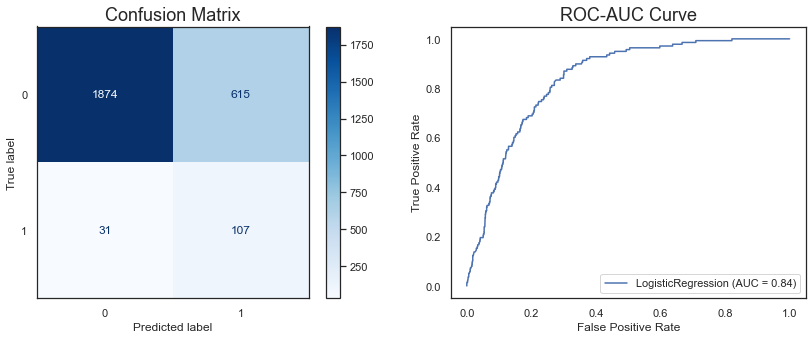

In [54]:
lr_metrics = model_eval(lr_clf, 'lr_clf', X_train_sm, y_train_sm, X_test_sc, y_test)

In [118]:
model_tracker.loc[len(model_tracker)] = lr_metrics

In [119]:
model_tracker

,Model,Train ROC AUC,Test ROC AUC,Accuracy,F1 Score,Precision,Sensitivity,Specificity
0,lr_clf,0.869,0.838,0.754,0.249,0.148,0.775,0.753


### KNN Classifier

Metrics for knn_clf
********************
Train ROC-AUC Score: 0.983
Train f1 Score: 0.929
Test ROC-AUC Score: 0.748
Test f1 Score: 0.244

Accuracy: 0.856
Precision: 0.168
Sensitivity/Recall (Positive Detection Rate): 0.442
Specificity (Negative Detection Rate): 0.879


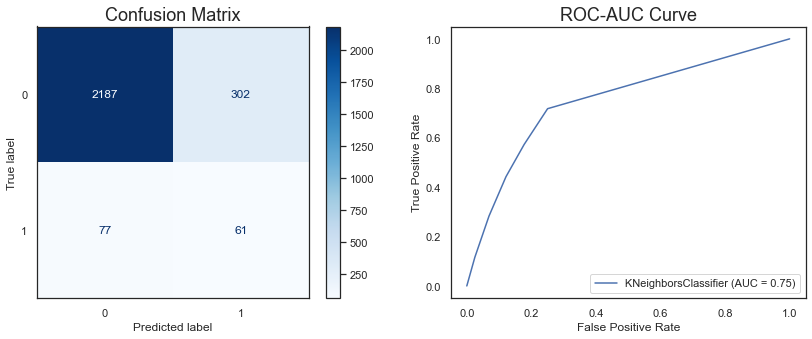

In [57]:
knn_metrics = model_eval(knn_clf, 'knn_clf', X_train_sm, y_train_sm, X_test_sc, y_test)

In [120]:
model_tracker.loc[len(model_tracker)] = knn_metrics

### Decision Tree Classifier

Metrics for dt_clf
********************
Train ROC-AUC Score: 0.999
Train f1 Score: 0.988
Test ROC-AUC Score: 0.592
Test f1 Score: 0.184

Accuracy: 0.912
Precision: 0.179
Sensitivity/Recall (Positive Detection Rate): 0.188
Specificity (Negative Detection Rate): 0.952


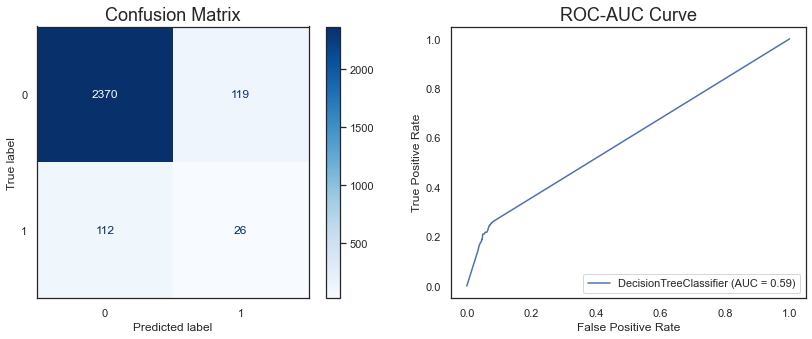

In [59]:
dt_metrics = model_eval(cart_clf, 'dt_clf', X_train_sm, y_train_sm, X_test_sc, y_test)

In [121]:
model_tracker.loc[len(model_tracker)] = dt_metrics

### Bagging Classifier

Metrics for bagged_clf
********************
Train ROC-AUC Score: 0.998
Train f1 Score: 0.985
Test ROC-AUC Score: 0.741
Test f1 Score: 0.166

Accuracy: 0.92
Precision: 0.183
Sensitivity/Recall (Positive Detection Rate): 0.152
Specificity (Negative Detection Rate): 0.962


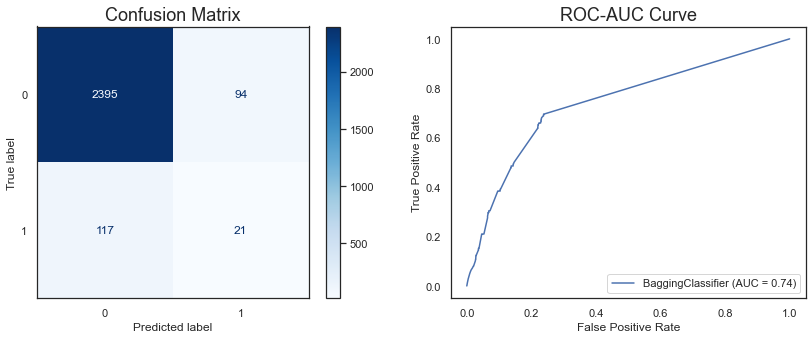

In [61]:
bagged_metrics = model_eval(bagged_clf, 'bagged_clf', X_train_sm, y_train_sm, X_test_sc, y_test)

In [122]:
model_tracker.loc[len(model_tracker)] = bagged_metrics

### Random Forest Classifier

Metrics for rf_clf
********************
Train ROC-AUC Score: 0.998
Train f1 Score: 0.988
Test ROC-AUC Score: 0.81
Test f1 Score: 0.257

Accuracy: 0.919
Precision: 0.247
Sensitivity/Recall (Positive Detection Rate): 0.268
Specificity (Negative Detection Rate): 0.955


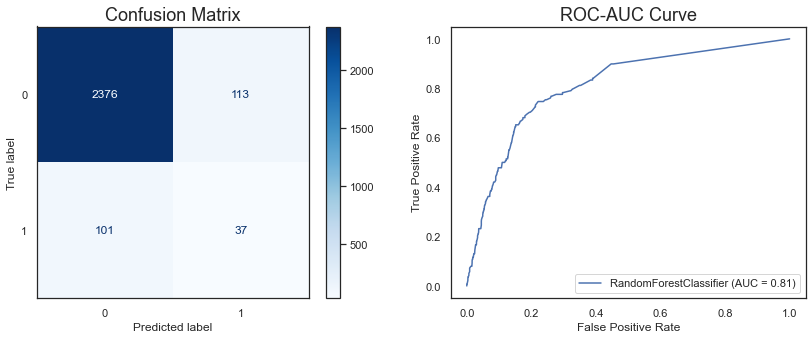

In [63]:
rf_metrics = model_eval(rf_clf, 'rf_clf', X_train_sm, y_train_sm, X_test_sc, y_test)

In [123]:
model_tracker.loc[len(model_tracker)] = rf_metrics

### AdaBoost Classifier

Metrics for ada_clf
********************
Train ROC-AUC Score: 0.964
Train f1 Score: 0.889
Test ROC-AUC Score: 0.832
Test f1 Score: 0.272

Accuracy: 0.845
Precision: 0.181
Sensitivity/Recall (Positive Detection Rate): 0.551
Specificity (Negative Detection Rate): 0.862


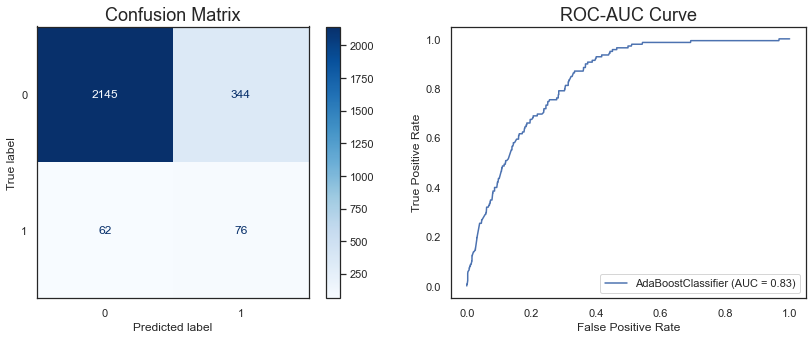

In [65]:
ada_metrics = model_eval(ada_clf, 'ada_clf', X_train_sm, y_train_sm, X_test_sc, y_test)

In [124]:
model_tracker.loc[len(model_tracker)] = ada_metrics

### SVC

Metrics for svc
********************
Train ROC-AUC Score: 0.978
Train f1 Score: 0.925
Test ROC-AUC Score: 0.828
Test f1 Score: 0.263

Accuracy: 0.827
Precision: 0.169
Sensitivity/Recall (Positive Detection Rate): 0.587
Specificity (Negative Detection Rate): 0.84


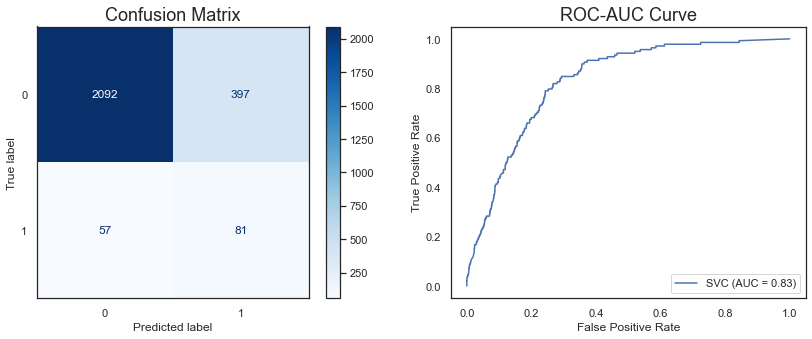

In [67]:
svc_metrics = model_eval(svc, 'svc', X_train_sm, y_train_sm, X_test_sc, y_test)

In [125]:
model_tracker.loc[len(model_tracker)] = svc_metrics

### Extra Trees Classifier

Metrics for et_clf
********************
Train ROC-AUC Score: 0.999
Train f1 Score: 0.988
Test ROC-AUC Score: 0.787
Test f1 Score: 0.234

Accuracy: 0.918
Precision: 0.229
Sensitivity/Recall (Positive Detection Rate): 0.239
Specificity (Negative Detection Rate): 0.955


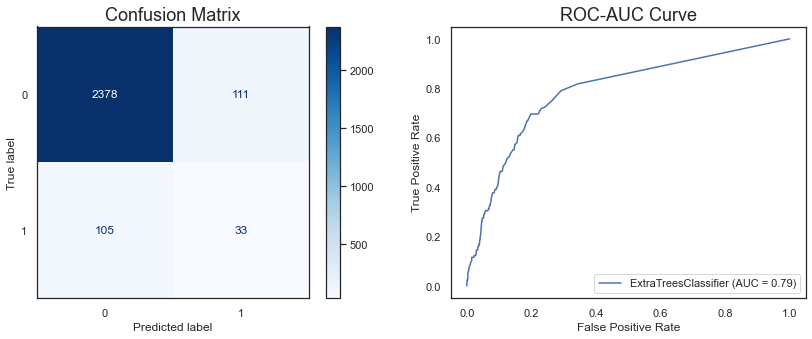

In [69]:
et_metrics = model_eval(et_clf, 'et_clf', X_train_sm, y_train_sm, X_test_sc, y_test)

In [126]:
model_tracker.loc[len(model_tracker)] = et_metrics

### XGBoost Classifier

Metrics for xgb_clf
********************
Train ROC-AUC Score: 0.998
Train f1 Score: 0.978
Test ROC-AUC Score: 0.837
Test f1 Score: 0.251

Accuracy: 0.927
Precision: 0.274
Sensitivity/Recall (Positive Detection Rate): 0.232
Specificity (Negative Detection Rate): 0.966


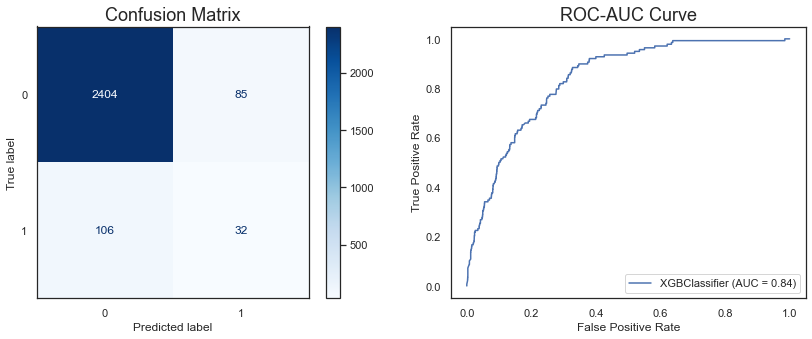

In [75]:
xgb_metrics = model_eval(xgb_clf, 'xgb_clf', X_train_sm, y_train_sm, X_test_sc, y_test)

In [127]:
model_tracker.loc[len(model_tracker)] = xgb_metrics

### Model Evaluation

In [128]:
model_tracker

,Model,Train ROC AUC,Test ROC AUC,Accuracy,F1 Score,Precision,Sensitivity,Specificity
0,lr_clf,0.869,0.838,0.754,0.249,0.148,0.775,0.753
1,knn_clf,0.983,0.748,0.856,0.244,0.168,0.442,0.879
2,dt_clf,0.999,0.592,0.912,0.184,0.179,0.188,0.952
3,bagged_clf,0.998,0.741,0.920,0.166,0.183,0.152,0.962
4,rf_clf,0.998,0.810,0.919,0.257,0.247,0.268,0.955
5,ada_clf,0.964,0.832,0.845,0.272,0.181,0.551,0.862
6,svc,0.978,0.828,0.827,0.263,0.169,0.587,0.840
7,et_clf,0.999,0.787,0.918,0.234,0.229,0.239,0.955
8,xgb_clf,0.998,0.837,0.927,0.251,0.274,0.232,0.966


Based on the metrics, we can see the following:
- Logistic Regression and XGBoost gave us the best test ROC-AUC.
- XGBoost gives us the best accuracy, although with an imbalanced sample with most of our metrics being in the negative class, this may mean it tends to predict toward the negative class.
- AdaBoost gives us the best f1 score, followed by SVC
- Of all the models, Logistic Regression, by far, gives us the best sensitivity, meaning it is the best at predicting the positive class.

#### Kaggle Scoring

With our first set of models, we'll try scoring the top performing ones on Kaggle to see which one has given us the best predictions.

In [82]:
# Logistic Regression
create_submission(lr_clf, test_sc, 'final_lrclf_notuning')
# XGBoost
create_submission(xgb_clf, test_sc, 'final_xgbclf_notuning')
# AdaBoost
create_submission(ada_clf, test_sc, 'final_adaclf_notuning')
# SVC
create_submission(svc, test_sc, 'final_svc_notuning')
# RF
create_submission(rf_clf, test_sc, 'final_rfclf_notuning')

In [83]:
#create_submission(cart_clf, test_sc, 'final_cartclf_notuning')
#create_submission(knn_clf, test_sc, 'final_knnclf_notuning')
#create_submission(bagged_clf, test_sc, 'final_baggedclf_notuning')
#create_submission(et_clf, test_sc, 'final_etclf_notuning')

Of the five models submitted, the logistic regression model gave us the best score of 0.76 and 
0.78 as our private and public scores, followed by Random Forest with 0.69 public score and XGBoost with a 0.66 public score.

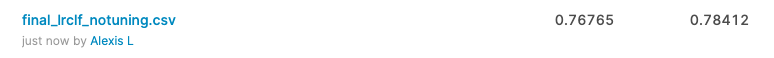

In [219]:
from IPython.display import Image 

Image("assets/lrclfnotuning.png")

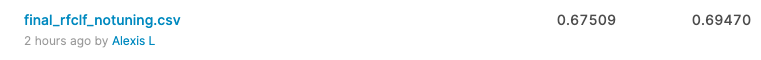

In [202]:
Image("assets/rfclfnotuning.png")

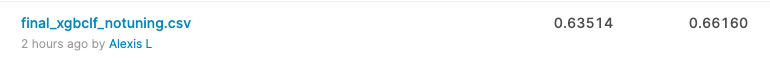

In [200]:
Image("assets/xgbnotuning.png")

## RFE Features

As we have quite a lot of features after performing polynomial features on our X data, we'll try reducing the number of features using recursive feature elimination and see if it would help to improve our metrics.

In [84]:
model = LogisticRegression()

rfe = RFECV(model,scoring='roc_auc')

In [90]:
X_rfe = rfe.fit_transform(X_train_sm, y_train_sm) 

In [91]:
rfe_filter = pd.DataFrame(index=X.columns.tolist())#Create dataframe to store information about RFE ranking.

rfe_filter['rfesupport'] = rfe.support_ #Add RFE support values to dataframe
rfe_filter['rferank'] = rfe.ranking_ #Add RFE ranks to dataframe

rfe_vars = rfe_filter.loc[rfe_filter['rferank'] == 1,:].index.tolist() #Create list of variables shortlisted by RFE

In [93]:
X_train_sm.shape[1] - len(rfe_vars)

26

In [94]:
len(rfe_vars)

161

Only around 26 features were dropped, giving us a list of 161 shortlisted features. We can take a look at the features that were dropped and those that were shortlisted.

In [95]:
rfe_filter.loc[rfe_filter['rfesupport'] == False,:]

,rfesupport,rferank
year,False,13
day,False,5
avgwind_week5_7,False,8
latitude year,False,9
latitude week,False,4
latitude day,False,18
latitude avglight_week8_8,False,16
latitude avgwind_week5_7,False,12
longitude week,False,7
longitude avgtemp_week1_8,False,2


In [96]:
rfe_filter.loc[rfe_filter['rfesupport'] == True,:]

,rfesupport,rferank
latitude,True,1
longitude,True,1
month,True,1
week,True,1
dayofyear,True,1
avgtemp_week1_8,True,1
avghumid_week7_8,True,1
avghumid_week1_2,True,1
avglight_week8_8,True,1
avgrain_week1_1,True,1


### Logistic Regression RFE

In [97]:
lr_clf_rfe = LogisticRegression()

lr_clf_rfe.fit(X_train_sm[rfe_vars], y_train_sm)

LogisticRegression()

Metrics for lr_clf_rfe
********************
Train ROC-AUC Score: 0.87
Train f1 Score: 0.8
Test ROC-AUC Score: 0.838
Test f1 Score: 0.249

Accuracy: 0.754
Precision: 0.148
Sensitivity/Recall (Positive Detection Rate): 0.775
Specificity (Negative Detection Rate): 0.753


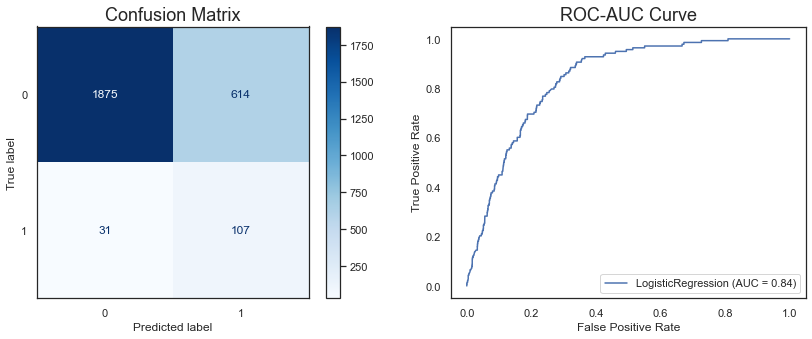

In [98]:
lr_rfe_metrics = model_eval(lr_clf_rfe, 'lr_clf_rfe', 
                            X_train_sm[rfe_vars], y_train_sm, 
                            X_test_sc[rfe_vars], y_test)

In [129]:
model_tracker.loc[len(model_tracker)] = lr_rfe_metrics

In [130]:
model_tracker

,Model,Train ROC AUC,Test ROC AUC,Accuracy,F1 Score,Precision,Sensitivity,Specificity
0,lr_clf,0.869,0.838,0.754,0.249,0.148,0.775,0.753
1,knn_clf,0.983,0.748,0.856,0.244,0.168,0.442,0.879
2,dt_clf,0.999,0.592,0.912,0.184,0.179,0.188,0.952
3,bagged_clf,0.998,0.741,0.920,0.166,0.183,0.152,0.962
4,rf_clf,0.998,0.810,0.919,0.257,0.247,0.268,0.955
5,ada_clf,0.964,0.832,0.845,0.272,0.181,0.551,0.862
6,svc,0.978,0.828,0.827,0.263,0.169,0.587,0.840
7,et_clf,0.999,0.787,0.918,0.234,0.229,0.239,0.955
8,xgb_clf,0.998,0.837,0.927,0.251,0.274,0.232,0.966
9,lr_clf_rfe,0.870,0.838,0.754,0.249,0.148,0.775,0.753


### Random Forest RFE

In [102]:
#model_rf = RandomForestClassifier()

#rfe_rf = RFECV(model_rf,scoring='roc_auc')

In [103]:
#X_rfe_rf = rfe_rf.fit_transform(X_train_sm, y_train_sm) 

In [91]:
#rfe_filter['rfesupport_rf'] = rfe_rf.support_ #Add RFE support values to dataframe
#rfe_filter['rferank_rf'] = rfe_rf.ranking_ #Add RFE ranks to dataframe

#rfe_vars_rf = rfe_filter.loc[rfe_filter['rferank_rf'] == 1,:].index.tolist() #Create list of variables shortlisted by RFE

In [104]:
rf_clf_rfe = RandomForestClassifier()

rf_clf_rfe.fit(X_train_sm[rfe_vars], y_train_sm)

RandomForestClassifier()

Metrics for rf_clf_rfe
********************
Train ROC-AUC Score: 0.998
Train f1 Score: 0.988
Test ROC-AUC Score: 0.817
Test f1 Score: 0.276

Accuracy: 0.92
Precision: 0.263
Sensitivity/Recall (Positive Detection Rate): 0.29
Specificity (Negative Detection Rate): 0.955


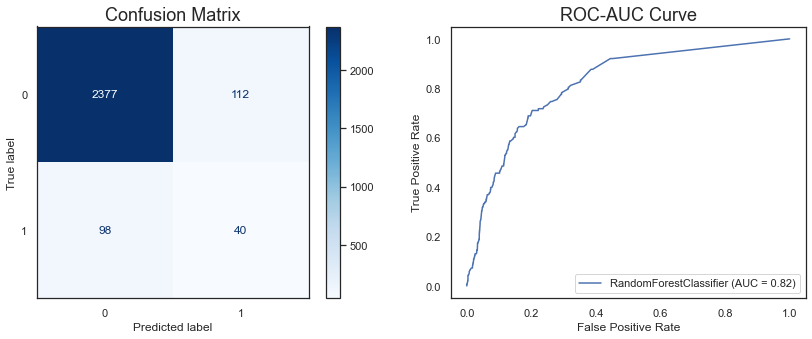

In [105]:
rf_rfe_metrics = model_eval(rf_clf_rfe, 'rf_clf_rfe', 
                            X_train_sm[rfe_vars], y_train_sm, 
                            X_test_sc[rfe_vars], y_test)

In [131]:
model_tracker.loc[len(model_tracker)] = rf_rfe_metrics

In [132]:
model_tracker

,Model,Train ROC AUC,Test ROC AUC,Accuracy,F1 Score,Precision,Sensitivity,Specificity
0,lr_clf,0.869,0.838,0.754,0.249,0.148,0.775,0.753
1,knn_clf,0.983,0.748,0.856,0.244,0.168,0.442,0.879
2,dt_clf,0.999,0.592,0.912,0.184,0.179,0.188,0.952
3,bagged_clf,0.998,0.741,0.920,0.166,0.183,0.152,0.962
4,rf_clf,0.998,0.810,0.919,0.257,0.247,0.268,0.955
5,ada_clf,0.964,0.832,0.845,0.272,0.181,0.551,0.862
6,svc,0.978,0.828,0.827,0.263,0.169,0.587,0.840
7,et_clf,0.999,0.787,0.918,0.234,0.229,0.239,0.955
8,xgb_clf,0.998,0.837,0.927,0.251,0.274,0.232,0.966
9,lr_clf_rfe,0.870,0.838,0.754,0.249,0.148,0.775,0.753


### XGBoost  RFE

In [133]:
xgb_clf_rfe = xgb.XGBClassifier()

xgb_clf_rfe.fit(X_train_sm[rfe_vars], y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Metrics for xgb_clf_rfe
********************
Train ROC-AUC Score: 0.998
Train f1 Score: 0.976
Test ROC-AUC Score: 0.834
Test f1 Score: 0.296

Accuracy: 0.931
Precision: 0.319
Sensitivity/Recall (Positive Detection Rate): 0.275
Specificity (Negative Detection Rate): 0.967


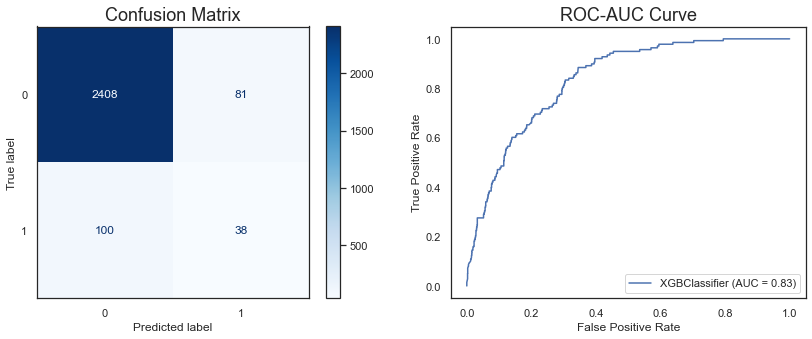

In [134]:
xgb_rfe_metrics = model_eval(xgb_clf_rfe, 'xgb_clf_rfe', 
                            X_train_sm[rfe_vars], y_train_sm, 
                            X_test_sc[rfe_vars], y_test)

In [135]:
model_tracker.loc[len(model_tracker)] = xgb_rfe_metrics

### Model Evaluation

In [137]:
model_tracker[model_tracker['Model'].str.contains('lr|rf|xgb')]

,Model,Train ROC AUC,Test ROC AUC,Accuracy,F1 Score,Precision,Sensitivity,Specificity
0,lr_clf,0.869,0.838,0.754,0.249,0.148,0.775,0.753
4,rf_clf,0.998,0.810,0.919,0.257,0.247,0.268,0.955
8,xgb_clf,0.998,0.837,0.927,0.251,0.274,0.232,0.966
9,lr_clf_rfe,0.870,0.838,0.754,0.249,0.148,0.775,0.753
10,rf_clf_rfe,0.998,0.817,0.920,0.276,0.263,0.290,0.955
11,xgb_clf_rfe,0.998,0.834,0.931,0.296,0.319,0.275,0.967


For the three models leveraging RFE shortlisted variables, we see an improvement for the Random Forest and XGBoost model metrics, particularly for the f1 scores and sensitivity. However, we don't see a significant difference for the Logistic Regression model.

#### Kaggle Scoring

In [138]:
# Logistic Regression
create_submission(lr_clf_rfe, test_sc[rfe_vars], 'final_lrclf_rfe')
# XGBoost
create_submission(xgb_clf_rfe, test_sc[rfe_vars], 'final_xgbclf_rfe')
# RF
create_submission(rf_clf_rfe, test_sc[rfe_vars], 'final_rfclf_rfe')

Leveraging the RFE variables, the Kaggle score improved for the XGBoost and Random Forest models, but not for the Logistic Regression model. However, the Logistic Regression model still gives us the highest score of the three models at 0.73.

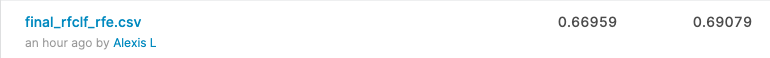

In [203]:
Image("assets/rfrfe.png")

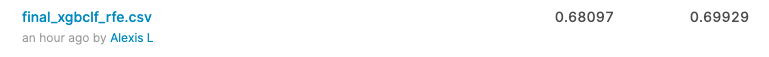

In [204]:
Image("assets/xgbrfe.png")

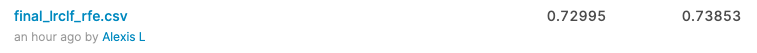

In [205]:
Image("assets/lrclfrfe.png")

## Modeling w/ Gridsearch

### Logistic Regression Gridsearch

In [144]:
lr_clf_gs = LogisticRegression()
lr_params = {'solver': ['lbfgs', 'liblinear'],
            'C': [1.0, 0.98, 0.95],
             'random_state': [42],
             'n_jobs': [None, -1]}

In [145]:
lr_clf_best = model_tuning(lr_clf_gs, lr_params, X_train_sm, y_train_sm, X_test_sc, y_test)

For LogisticRegression():
Best score: 0.871
Train score: 0.875
Test score: 0.846
Best parameters: {'C': 1.0, 'n_jobs': None, 'random_state': 42, 'solver': 'liblinear'}



Metrics for lr_clf_gs
********************
Train ROC-AUC Score: 0.875
Train f1 Score: 0.807
Test ROC-AUC Score: 0.846
Test f1 Score: 0.257

Accuracy: 0.756
Precision: 0.153
Sensitivity/Recall (Positive Detection Rate): 0.804
Specificity (Negative Detection Rate): 0.753


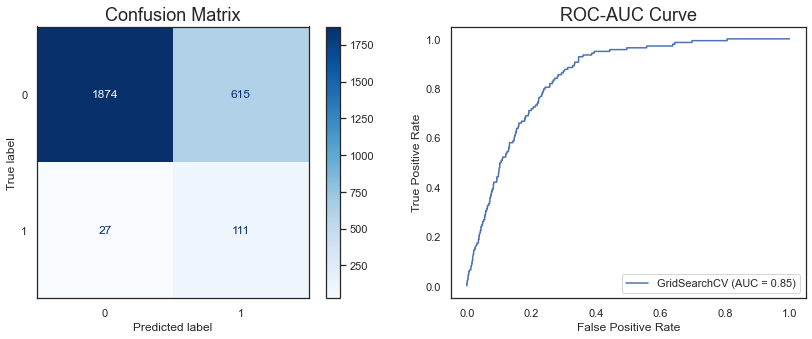

In [146]:
lr_clf_best_metrics = model_eval(lr_clf_best, 'lr_clf_gs', 
                            X_train_sm, y_train_sm, 
                            X_test_sc, y_test)

In [147]:
model_tracker.loc[len(model_tracker)] = lr_clf_best_metrics

### Model Evaluation

In [ ]:
create_submission(lr_clf_best, test_sc, 'final_lrclf_gs')

In [152]:
model_tracker[model_tracker['Model'].str.contains('lr')]

,Model,Train ROC AUC,Test ROC AUC,Accuracy,F1 Score,Precision,Sensitivity,Specificity
0,lr_clf,0.869,0.838,0.754,0.249,0.148,0.775,0.753
9,lr_clf_rfe,0.870,0.838,0.754,0.249,0.148,0.775,0.753
12,lr_clf_gs,0.875,0.846,0.756,0.257,0.153,0.804,0.753


The Logistic Regression model tuned with gridsearch gives us a higher AUC test score as well as a higher f1 score and sensitivity. However, the Kaggle score is actually lower at 0.69.

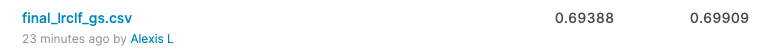

In [206]:
Image("assets/lrclfgs.png")

# Model Interpretation

Overall, our best model that gave us best score on Kaggle was the original Logistic Regression model with default parameters and using all of our features.

In [193]:
model_tracker

,Model,Train ROC AUC,Test ROC AUC,Accuracy,F1 Score,Precision,Sensitivity,Specificity
0,lr_clf,0.869,0.838,0.754,0.249,0.148,0.775,0.753
1,knn_clf,0.983,0.748,0.856,0.244,0.168,0.442,0.879
2,dt_clf,0.999,0.592,0.912,0.184,0.179,0.188,0.952
3,bagged_clf,0.998,0.741,0.920,0.166,0.183,0.152,0.962
4,rf_clf,0.998,0.810,0.919,0.257,0.247,0.268,0.955
5,ada_clf,0.964,0.832,0.845,0.272,0.181,0.551,0.862
6,svc,0.978,0.828,0.827,0.263,0.169,0.587,0.840
7,et_clf,0.999,0.787,0.918,0.234,0.229,0.239,0.955
8,xgb_clf,0.998,0.837,0.927,0.251,0.274,0.232,0.966
9,lr_clf_rfe,0.870,0.838,0.754,0.249,0.148,0.775,0.753


In [153]:
model_coefs = pd.DataFrame(index=X.columns)

In [187]:
coef_list = [j for i in lr_clf.coef_.tolist() for j in i]
coef_list_rfe = [j for i in lr_clf_rfe.coef_.tolist() for j in i]

In [175]:
model_coefs['coefs'] = coef_list
model_coefs['coefs'] = model_coefs['coefs'].map(lambda x: abs(x))

In [180]:
model_coefs = model_coefs.sort_values(by='coefs',ascending=False) 

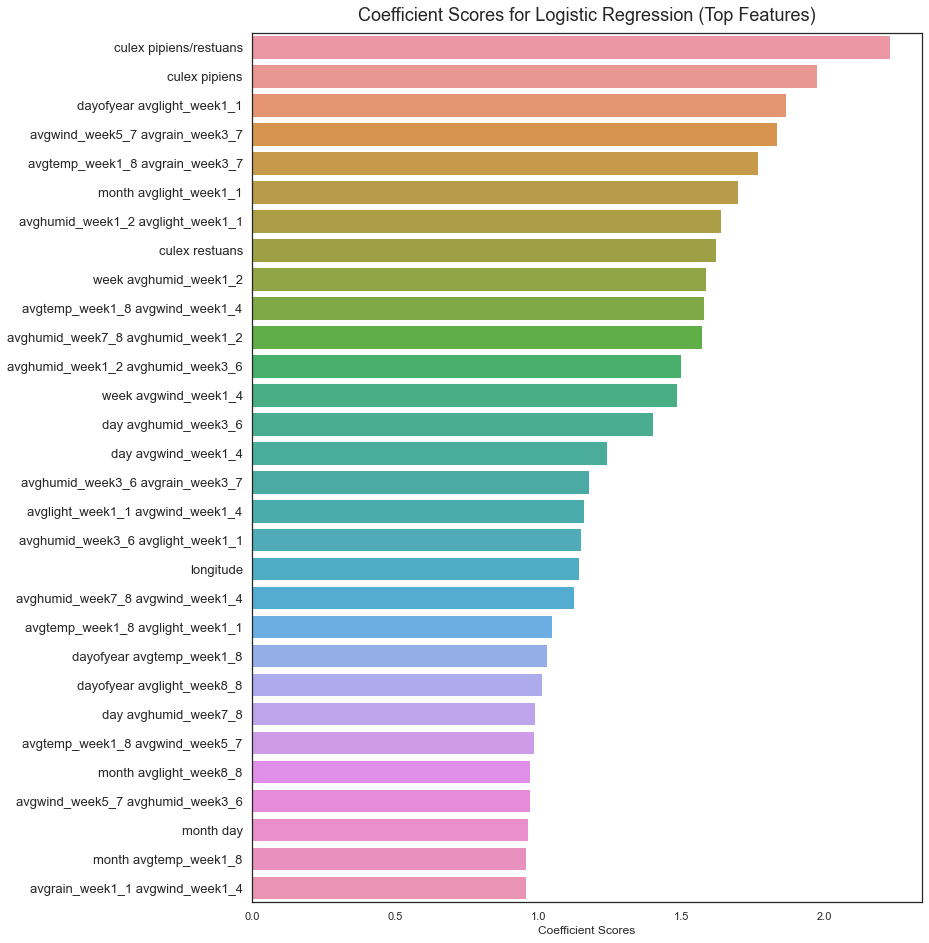

In [190]:
fig, ax = plt.subplots(figsize=(12,16))

sns.barplot(ax = ax, x = model_coefs['coefs'].head(30),y=list(range(30)),orient='h');
ax.set_title('Coefficient Scores for Logistic Regression (Top Features)',fontsize=18,pad=12.0);
ax.set_xlabel('Coefficient Scores')
ax.set_yticks(list(range(30)));
ax.set_yticklabels(model_coefs.index[:30], fontsize=13);

In [191]:
model_coefs_rfe = pd.DataFrame(index=X[rfe_vars].columns)
model_coefs_rfe['coefs'] = coef_list_rfe
model_coefs_rfe['coefs'] = model_coefs_rfe['coefs'].map(lambda x: abs(x))
model_coefs_rfe = model_coefs_rfe.sort_values(by='coefs',ascending=False) 

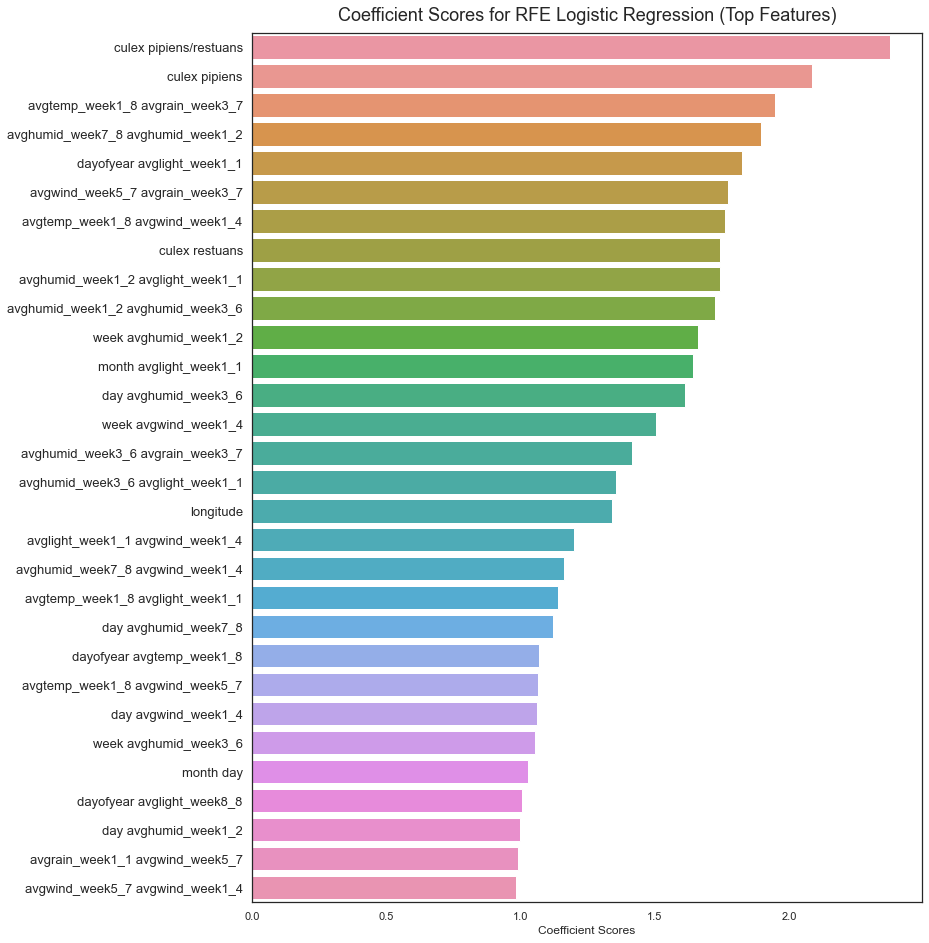

In [192]:
fig, ax = plt.subplots(figsize=(12,16))

sns.barplot(ax = ax, x = model_coefs_rfe['coefs'].head(30),y=list(range(30)),orient='h');
ax.set_title('Coefficient Scores for RFE Logistic Regression (Top Features)',fontsize=18,pad=12.0);
ax.set_xlabel('Coefficient Scores')
ax.set_yticks(list(range(30)));
ax.set_yticklabels(model_coefs_rfe.index[:30], fontsize=13);

Based on the model coefficients, our top features for the model appear to be the species of mosquito as well as interaction features that combined the top correlated weather features with day of the year, week and month. Interestingly, longitude appears to be one of the top features as well.

_Most Predictive Clusters_

In [211]:
model_coefs[model_coefs.index.str.contains('Cluster')].head(10)

,coefs
Cluster: 14,0.612896
Cluster: 13,0.556119
Cluster: 16,0.385703
Cluster: 11,0.333150
Cluster: 19,0.330496
Cluster: 9,0.225334
Cluster: 1,0.217088
Cluster: 12,0.213641
Cluster: 10,0.205353
Cluster: 26,0.203574


In [212]:
df_orig = pd.read_csv('../datasets/train_modeling_final.csv')

In [217]:
df_orig.loc[df_orig['ClusterIDs'].str.contains('14'),'trap'].unique()

array(['T009', 'T900'], dtype=object)

In [218]:
df_orig.loc[df_orig['ClusterIDs'].str.contains('13'),'trap'].unique()

array(['T200', 'T212', 'T215', 'T103', 'T221'], dtype=object)

Based on our modeling, the most indicative features for the presence of West Nile Virus mosquitos appear to be the presence of the Culex Pipiens / Culex Restuans mosquitos, followed by weather in the previous weeks and the time of the year (day of year, week of the year and month). 